In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC

In [ ]:
file_path = '/content/drive/MyDrive/MACHINE LEARNING/DATASETS/ObesityDataSet_raw_and_data_sinthetic.csv'
df = pd.read_csv(file_path)

In [ ]:
print(df.head())

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        

In [ ]:
print(df.columns.tolist())

['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad']


In [ ]:
X = df.drop("NObeyesdad", axis=1)
y = df["NObeyesdad"]


In [ ]:
le = LabelEncoder()
for col in X.select_dtypes(include=['object']).columns:
    X[col] = le.fit_transform(X[col])
    y = le.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
def evaluate_model(model, X_test, y_test):
      y_pred = model.predict(X_test)
      cm = confusion_matrix(y_test, y_pred)
      acc = accuracy_score(y_test, y_pred)
      prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
      rec = recall_score(y_test, y_pred, average='weighted')
      f1 = f1_score(y_test, y_pred, average='weighted')

      print("\nConfusion Matrix:\n", cm)
      print(f"Accuracy : {acc:.4f}")
      print(f"Precision: {prec:.4f}")
      print(f"Recall   : {rec:.4f}")
      print(f"F1 Score : {f1:.4f}")

      return acc, prec, rec, f1

In [ ]:
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_rbf.fit(X_train, y_train)

print("\n--- Results for RBF Kernel ---")
acc_rbf, prec_rbf, rec_rbf, f1_rbf = evaluate_model(svm_rbf, X_test, y_test)


--- Results for RBF Kernel ---

Confusion Matrix:
 [[52  4  0  0  0  0  0]
 [ 3 52  1  0  0  4  2]
 [ 0  0 70  4  0  2  2]
 [ 0  0  1 57  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 1 12  0  0  0 41  2]
 [ 0  2  2  0  0  5 41]]
Accuracy : 0.8889
Precision: 0.8908
Recall   : 0.8889
F1 Score : 0.8890


In [ ]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = []
cv_results = []

print("\n--- Comparing Different Kernels ---")
for k in kernels:
    print(f"\nKernel = {k}")
    svm = SVC(kernel=k, C=1.0, gamma='scale')
    svm.fit(X_train, y_train)
    acc, prec, rec, f1 = evaluate_model(svm, X_test, y_test)
    results.append([k, acc, prec, rec, f1])

    # Perform cross-validation
    cv_accuracy = cross_val_score(svm, X_train, y_train, cv=5, scoring='accuracy').mean()
    cv_precision = cross_val_score(svm, X_train, y_train, cv=5, scoring='precision_weighted').mean()
    cv_recall = cross_val_score(svm, X_train, y_train, cv=5, scoring='recall_weighted').mean()
    cv_f1 = cross_val_score(svm, X_train, y_train, cv=5, scoring='f1_weighted').mean()
    cv_results.append([k, cv_accuracy, cv_precision, cv_recall, cv_f1])


--- Comparing Different Kernels ---

Kernel = linear

Confusion Matrix:
 [[56  0  0  0  0  0  0]
 [ 5 53  0  0  0  4  0]
 [ 0  0 75  2  0  0  1]
 [ 0  0  1 57  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  2  0  0  0 52  2]
 [ 0  0  0  0  0  2 48]]
Accuracy : 0.9551
Precision: 0.9561
Recall   : 0.9551
F1 Score : 0.9548

Kernel = poly

Confusion Matrix:
 [[54  2  0  0  0  0  0]
 [ 5 34  4  1  0  9  9]
 [ 0  0 73  2  0  1  2]
 [ 0  0  2 56  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 1  6  4  1  0 41  3]
 [ 0  3 11  0  0  5 31]]
Accuracy : 0.8322
Precision: 0.8284
Recall   : 0.8322
F1 Score : 0.8261

Kernel = rbf

Confusion Matrix:
 [[52  4  0  0  0  0  0]
 [ 3 52  1  0  0  4  2]
 [ 0  0 70  4  0  2  2]
 [ 0  0  1 57  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 1 12  0  0  0 41  2]
 [ 0  2  2  0  0  5 41]]
Accuracy : 0.8889
Precision: 0.8908
Recall   : 0.8889
F1 Score : 0.8890

Kernel = sigmoid

Confusion Matrix:
 [[32 20  0  0  0  4  0]
 [28 19  0  0  0  8  7]
 [ 0  1 46 13  0  2 16]
 [ 0  0 12 46  0  0  0]


In [ ]:
results_df = pd.DataFrame(results, columns=['Kernel', 'Accuracy', 'Precision', 'Recall', 'F1'])
cv_df = pd.DataFrame(cv_results, columns=['Kernel', 'Accuracy', 'Precision', 'Recall', 'F1'])

/tmp/ipython-input-3740663360.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Kernel', y='Accuracy', data=results_df, palette='mako')


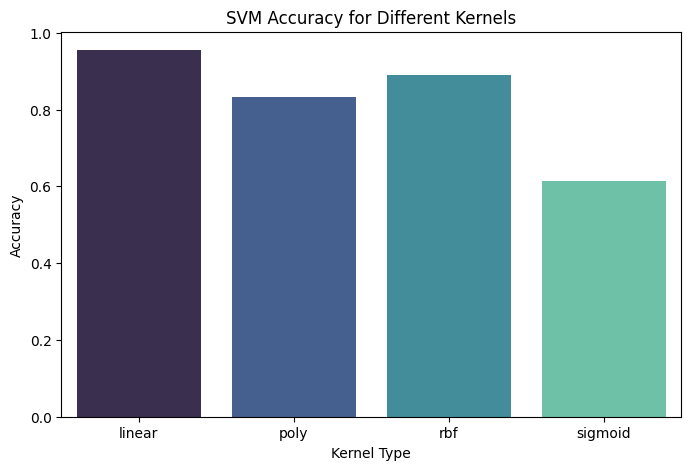

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Kernel', y='Accuracy', data=results_df, palette='mako')
plt.title("SVM Accuracy for Different Kernels")
plt.ylabel("Accuracy")
plt.xlabel("Kernel Type")
plt.show()

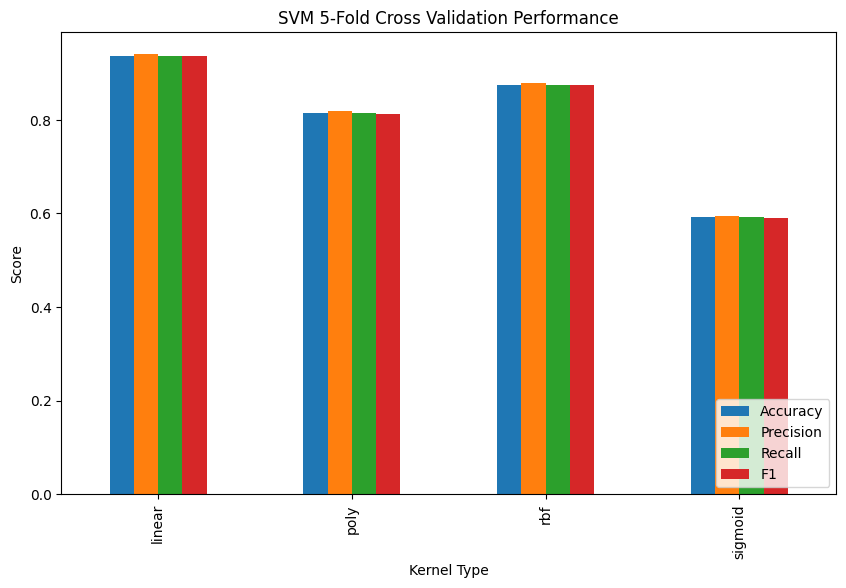

In [ ]:
cv_df.plot(x='Kernel', y=['Accuracy', 'Precision', 'Recall', 'F1'], kind='bar', figsize=(10,6))
plt.title("SVM 5-Fold Cross Validation Performance")
plt.ylabel("Score")
plt.xlabel("Kernel Type")
plt.legend(loc='lower right')
plt.show()

In [ ]:
print("\n===== First 5 Support Vectors (RBF Kernel) =====")
print(svm_rbf.support_vectors_[:5])


===== First 5 Support Vectors (RBF Kernel) =====
[[-1.01311923 -0.22475032  0.42645498 -1.21575492  0.46961161  0.35508317
   1.07671674  0.40151284 -1.79185567 -0.15378783  0.0059325  -0.21412338
   1.18621306 -0.95110334  1.41169828  0.50676114]
 [-1.01311923 -0.06933846 -1.08977027 -1.594309    0.46961161 -2.81624163
  -0.7857288   0.40151284  2.39741355 -0.15378783 -0.01014187 -0.21412338
  -0.00501225 -1.06947172  1.41169828  0.50676114]
 [-1.01311923 -0.91331869 -0.14572896 -1.594309   -2.12941922  0.35508317
   1.07671674  0.40151284  0.30277894 -0.15378783  1.63076918  4.67020458
   1.82919121  1.0611044   1.41169828  0.50676114]
 [-1.01311923 -0.21824101 -1.10465615 -1.67119416 -2.12941922 -2.81624163
   0.61809325  0.16168557 -1.79185567 -0.15378783  0.55867502 -0.21412338
   0.72431306 -1.06947172  1.41169828  0.50676114]
 [ 0.98705066 -0.9761472  -0.02333874 -1.3227063   0.46961161  0.35508317
   0.80389268  0.40151284  0.30277894 -0.15378783 -0.01014187 -0.21412338
  -0.3